In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from tqdm import tqdm
from scipy.optimize import curve_fit

In [61]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [62]:
def rn(phi):
    return np.cos(phi)*sigmax()+np.sin(phi)*sigmay()

r_ls = np.linspace(1., 1.5, 101)
res1, res2 = [], []
for r in r_ls:
    Had = ry(-np.pi/2*r)*rx(np.pi*r)

    beta = np.arccos(27/32)
    theta = np.arctan(1/2)
#     phi1 = 3*np.pi/2-theta-beta/2
#     phi2 = np.pi/2+beta/2-theta
    phi1 = -(-np.pi/2-theta-beta/2)
    phi2 = -(np.pi/2+beta/2-theta)
    Had_sk1 = rotation(rn(phi2),2*np.pi*r)*rotation(rn(phi1), 2*np.pi*r)*ry(-np.pi/2*r)*rx(np.pi*r)
    
    state1 = Had*Had*basis(2,1)
    state2 = Had_sk1*Had_sk1*basis(2,1)
    res1.append(np.real(basis(2,0).dag()*ket2dm(state1)*basis(2,0))[0][0])
    res2.append(np.real(basis(2,0).dag()*ket2dm(state2)*basis(2,0))[0][0])

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  import sys
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  from ipykernel import kernelapp as app


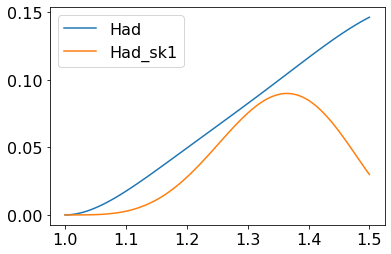

In [63]:
plt.plot(r_ls, res1, label = 'Had')
plt.plot(r_ls, res2, label = 'Had_sk1')
plt.legend()

In [64]:
import pandas as pd
df = pd.read_excel('data231218.xlsx')
df

,r,filename_Had,filename_Had_sk1
0,1.0,Kick_phse_cal_sq_003,Kick_phse_cal_sq_014
1,1.1,Kick_phse_cal_sq_004,Kick_phse_cal_sq_013
2,1.2,Kick_phse_cal_sq_005,Kick_phse_cal_sq_012
3,1.3,Kick_phse_cal_sq_006,Kick_phse_cal_sq_011
4,1.4,Kick_phse_cal_sq_007,Kick_phse_cal_sq_010
5,1.5,Kick_phse_cal_sq_008,Kick_phse_cal_sq_009


In [65]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion3, ion3_raw, ion3_bottom, ion3_top, ion4, ion4_raw, ion4_bottom, \
    ion4_top, ion5, ion5_raw, ion5_bottom, ion5_top, ion2, ion2_raw, ion2_bottom, ion2_top, ion6, ion6_raw, \
    ion6_bottom, ion6_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion4

(-0.05, 1.05)

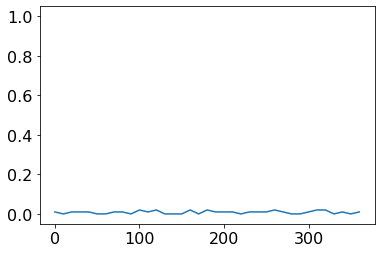

In [66]:
time, prob = readFile(df['filename_Had'][0])
plt.plot(time, prob)
plt.ylim([-0.05, 1.05])

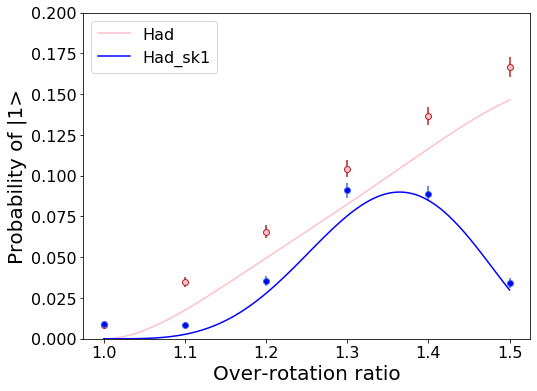

In [75]:
avg1, avg2 = [], []
std1, std2 = [], []
for i in range(len(df)):
    time1, prob1 = readFile(df['filename_Had'][i])
    time2, prob2 = readFile(df['filename_Had_sk1'][i])
    y1 = np.mean(prob1)
    y2 = np.mean(prob2)
    avg1.append(y1)
    avg2.append(y2)
    std1.append(np.sqrt(y1*(1-y1)/100/len(time1)))
    std2.append(np.sqrt(y2*(1-y2)/100/len(time2)))
xdata = df['r']

plt.figure(figsize = (8,6))
plt.errorbar(xdata, avg1, yerr=std1, ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
plt.errorbar(xdata, avg2, yerr=std2, ls='', marker='o',mec='royalblue', ecolor='royalblue',mfc='blue')
plt.plot(r_ls, res1, label = 'Had', color = 'pink')
plt.plot(r_ls, res2, label = 'Had_sk1', color = 'blue')
plt.xlabel('Over-rotation ratio')
plt.ylabel('Probability of |1>')
plt.ylim([0.0, 0.2])
plt.legend()